In [166]:
#import required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import sys
import csv
import seaborn as sns
import math
from PIL import Image

# Functions

In [167]:
def dead_tube_check(input_file):
    df = pd.read_csv(input_file, delimiter=",")

    if len(df.loc[(df['Resolution[um]']==0) & (df['Efficiency']==0)]) > 0:
        number=len(df.loc[(df['Resolution[um]']==0) & (df['Efficiency']==0)])
        print(str(number) + " dead tubes are suppressed.")
        display(df.loc[(df['Resolution[um]']==0) & (df['Efficiency']==0)])
    else:
        display("There are no dead tubes.")

In [168]:
def summary_hist(input_file, save_folder):
    df = pd.read_csv(input_file, delimiter=",")
    df=df.loc[(df['Resolution[um]']>0) & (df['Efficiency']>0)]
    df.hist(column=['T0[ns]', 'TMax[ns]',
        'ADC_peak[ns]', 'ADC_width[ns]', 'Resolution[um]', 'Efficiency'], bins=30, layout =(2,3), figsize= (15,5), color='skyblue', edgecolor='black', grid=False)
    plt.suptitle(input_file)
    #plt.show()
    plt.savefig(save_folder+"\\"+"hist.png", bbox_inches="tight")
    plt.close()

In [169]:
def calc_stats(run):
    df = pd.read_csv(run, delimiter=",") #import txt file
    df=df.loc[df['Resolution[um]']>0] #select alive tubes
    mins=df.min().to_frame()
    mins.columns=["Min"]
    maxes=df.max().to_frame()
    maxes.columns=["Max"]
    means=df.mean().to_frame()
    means.columns=["Mean"]
    summary=pd.concat([mins,maxes["Max"],means["Mean"]],axis=1)
    summary=summary.drop(labels=["Column", "Layer", "TDC_id", "TDC_Ch_id"], axis=0, inplace=False)
    return summary

In [170]:
# Make list of all files with certain extension

def makelist(folder, extension):

    all_files=os.listdir(folder)
    selected_files=[]

    for i in all_files:
        if extension in i:
            selected_files.append(i)
    print(selected_files)

    return selected_files

In [171]:
# Concat data for histogram from many files

def all_tube_data(folder, extension, parameter):
    
    file_names=makelist(folder, extension)

    data=[]

    for i in file_names:
        df = pd.read_csv(folder+"\\"+i, delimiter=",")

        # Select alive tubes
        #df=df.loc[(df['Resolution[um]']>0) & (df['Efficiency']>0)]
        #print(df)

        # Select parameter of interest
        values=df[parameter].tolist()

        # Add to summary array
        data+=values
        
    return data

# Code

In [172]:
# Make list of all files with .txt extension

all_files=os.listdir(r"C:\Users\svene\OneDrive\Documents\Tufts\Research\qual\eye_scanning\Cosmic_Data")
txt_files=[]
for i in all_files:
    if ".txt" in i and "BIS" in i:
        txt_files.append(i)
print(txt_files)

['Mod10_BIS2C04_CosmicRay_Thr108.txt', 'Mod10_BIS2C04_CosmicRay_Thr114.txt', 'Mod11_BIS2C06_CosmicRay_Thr108.txt', 'Mod11_BIS2C06_CosmicRay_Thr114.txt', 'Mod15_BIS2C14_CosmicRay_Thr108.txt', 'Mod15_BIS2C14_CosmicRay_Thr114.txt', 'Mod16_BIS2A16_CosmicRay_Thr108.txt', 'Mod16_BIS2A16_CosmicRay_Thr114.txt', 'Mod1_BIS1C02_CosmicRay_Thr108.txt', 'Mod1_BIS1C02_CosmicRay_Thr114.txt', 'Mod22_BIS3A12_CosmicRay_Thr108.txt', 'Mod22_BIS3A12_CosmicRay_Thr114.txt', 'Mod25_BIS4C08_CosmicRay_Thr108.txt', 'Mod25_BIS4C08_CosmicRay_Thr114.txt', 'Mod29_BIS4A16_CosmicRay_Thr108.txt', 'Mod29_BIS4A16_CosmicRay_Thr114.txt', 'Mod2_BIS1C04_CosmicRay_Thr108.txt', 'Mod2_BIS1C04_CosmicRay_Thr114.txt', 'Mod30_BIS5C02_CosmicRay_Thr108.txt', 'Mod30_BIS5C02_CosmicRay_Thr114.txt', 'Mod31_BIS5C04_CosmicRay_Thr108.txt', 'Mod31_BIS5C04_CosmicRay_Thr114.txt', 'Mod32_BIS5C05_CosmicRay_Thr108.txt', 'Mod32_BIS5C05_CosmicRay_Thr114.txt', 'Mod33_BIS5C08_CosmicRay_Thr108.txt', 'Mod33_BIS5C08_CosmicRay_Thr114.txt', 'Mod34_BIS5C10_

In [173]:
# Loop through files and make a dataframe with mean of ADC peak and ADC width

ADCp_mean=[]
ADCw_mean=[]

for i in txt_files:
    df = pd.read_csv(r"C:\Users\svene\OneDrive\Documents\Tufts\Research\qual\eye_scanning\Cosmic_Data"+"\\"+i, delimiter=",")

    # Select alive tubes
    df=df.loc[(df['Resolution[um]']>0) & (df['Efficiency']>0)]

    # Calculate mean of ADC_peak
    peak_means=df["ADC_peak[ns]"].mean()
    ADCp_mean.append(peak_means)

    # Calculate mean of ADC_width
    width_means=df["ADC_width[ns]"].mean()
    ADCw_mean.append(width_means)
    
print(ADCp_mean)
print(ADCw_mean)


[150.40301842569525, 147.68309547184478, 157.38339629557726, 155.13431443357865, 152.7093783611195, 150.8107100553897, 153.64841597070702, 151.72723057756357, 161.33027452498513, 160.12868427353288, 154.86343995706167, 152.93637957473646, 152.90592016352426, 150.90342497152895, 155.02849430730586, 152.5412236226013, 155.3741580105669, 153.96055435741235, 156.11387045261728, 154.16057836669248, 155.00959879769803, 153.06419929257862, 159.64904118211578, 159.12654427564993, 156.13263947449326, 166.06488101820324, 160.38940532863333, 158.58239908423076, 160.87796597654213, 158.7779838479485, 151.4477500193775, 149.98910509238232, 153.99261637155266, 150.50878651389846, 168.18874108548437, 164.84947546103666, 146.60392968214552, 145.64135750820597, 158.90449001538474, 157.37158493258747, 161.57561544914472, 159.26393660537147, 161.15037036949673, 159.52332222668826, 155.67671108000462, 154.5750460024482, 152.065060162814, 150.9189838853237, 157.26173326666674, 154.43087028915429, 158.42560

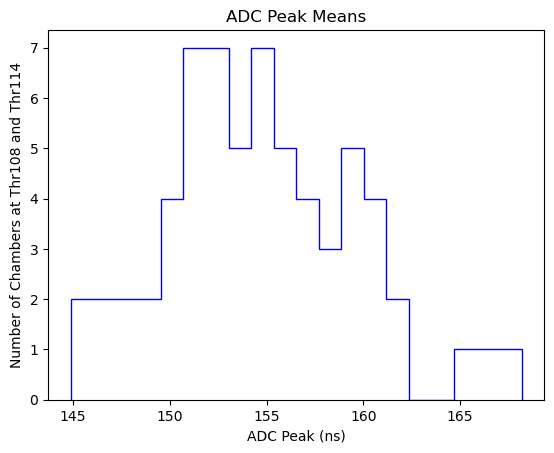

In [174]:
plt.hist(ADCp_mean, bins=20, histtype="step", facecolor="none", edgecolor="blue")
plt.title("ADC Peak Means")
plt.xlabel("ADC Peak (ns)")
plt.ylabel("Number of Chambers at Thr108 and Thr114")
plt.show()

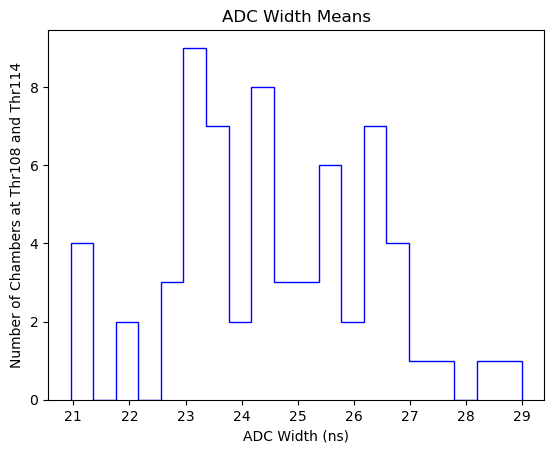

In [175]:
plt.hist(ADCw_mean, bins=20, histtype="step", facecolor="none",edgecolor="blue")
plt.title("ADC Width Means")
plt.xlabel("ADC Width (ns)")
plt.ylabel("Number of Chambers at Thr108 and Thr114")
plt.show()

# Make a histogram for ALL tubes

In [176]:
print(txt_files)

['Mod10_BIS2C04_CosmicRay_Thr108.txt', 'Mod10_BIS2C04_CosmicRay_Thr114.txt', 'Mod11_BIS2C06_CosmicRay_Thr108.txt', 'Mod11_BIS2C06_CosmicRay_Thr114.txt', 'Mod15_BIS2C14_CosmicRay_Thr108.txt', 'Mod15_BIS2C14_CosmicRay_Thr114.txt', 'Mod16_BIS2A16_CosmicRay_Thr108.txt', 'Mod16_BIS2A16_CosmicRay_Thr114.txt', 'Mod1_BIS1C02_CosmicRay_Thr108.txt', 'Mod1_BIS1C02_CosmicRay_Thr114.txt', 'Mod22_BIS3A12_CosmicRay_Thr108.txt', 'Mod22_BIS3A12_CosmicRay_Thr114.txt', 'Mod25_BIS4C08_CosmicRay_Thr108.txt', 'Mod25_BIS4C08_CosmicRay_Thr114.txt', 'Mod29_BIS4A16_CosmicRay_Thr108.txt', 'Mod29_BIS4A16_CosmicRay_Thr114.txt', 'Mod2_BIS1C04_CosmicRay_Thr108.txt', 'Mod2_BIS1C04_CosmicRay_Thr114.txt', 'Mod30_BIS5C02_CosmicRay_Thr108.txt', 'Mod30_BIS5C02_CosmicRay_Thr114.txt', 'Mod31_BIS5C04_CosmicRay_Thr108.txt', 'Mod31_BIS5C04_CosmicRay_Thr114.txt', 'Mod32_BIS5C05_CosmicRay_Thr108.txt', 'Mod32_BIS5C05_CosmicRay_Thr114.txt', 'Mod33_BIS5C08_CosmicRay_Thr108.txt', 'Mod33_BIS5C08_CosmicRay_Thr114.txt', 'Mod34_BIS5C10_

In [197]:
# Loop through files and make a dataframe with mean of ADC peak and ADC width

ADCps=[]
ADCws=[]

for i in txt_files:
    df = pd.read_csv(r"C:\Users\svene\OneDrive\Documents\Tufts\Research\qual\eye_scanning\Cosmic_Data"+"\\"+i, delimiter=",")

    # Select alive tubes
    df=df.loc[(df['Resolution[um]']>0) & (df['Efficiency']>0)]
    #print(df)

    # Select ADC peak and width
    df_peak=df['ADC_peak[ns]'].tolist()
    df_width=df['ADC_width[ns]'].tolist()

    # Add to ADCps and ADCws
    ADCps+=df_peak
    ADCws+=df_width
    
print(len(ADCps))
print(len(ADCws))

31210
31210


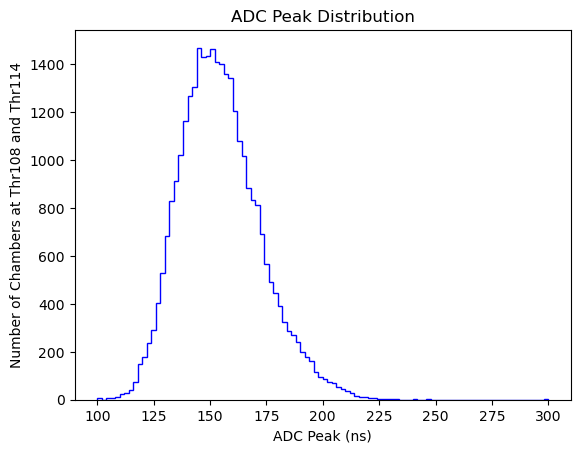

In [198]:
#plotting

plt.hist(ADCps, bins=100, histtype="step", facecolor="none", edgecolor="blue")
plt.title("ADC Peak Distribution")
plt.xlabel("ADC Peak (ns)")
plt.ylabel("Number of Chambers at Thr108 and Thr114")
plt.show()

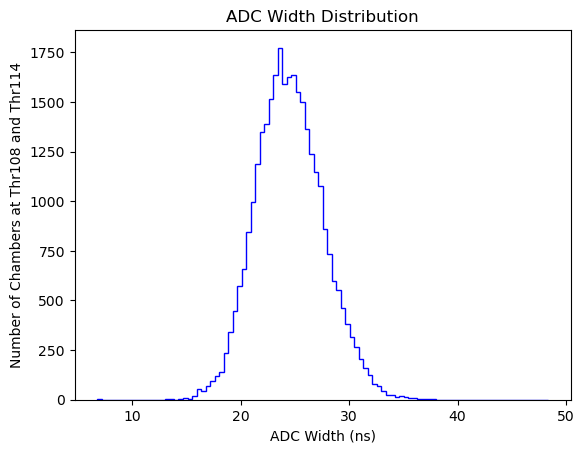

In [199]:
plt.hist(ADCws, bins=100, histtype="step", facecolor="none", edgecolor="blue")
plt.title("ADC Width Distribution")
plt.xlabel("ADC Width (ns)")
plt.ylabel("Number of Chambers at Thr108 and Thr114")
plt.show()

In [200]:
# Count BIS1 v. BIS6

files_108=[]
bis1=[]
bis6=[]

for i in txt_files:
    if "108" in i:
        files_108.append(i)
print(files_108)
print(len(files_108))

for i in files_108:
    df = pd.read_csv(r"C:\Users\svene\OneDrive\Documents\Tufts\Research\qual\eye_scanning\Cosmic_Data"+"\\"+i, delimiter=",")
    num_tubes=df["Column"].max()
    #print(num_tubes)
    if num_tubes==70:
        bis1.append(i)
    if num_tubes==58:
        bis6.append(i)
    
print("num BIS1 chambers:", len(bis1))
print("num BIS6 chambers:", len(bis6))

['Mod10_BIS2C04_CosmicRay_Thr108.txt', 'Mod11_BIS2C06_CosmicRay_Thr108.txt', 'Mod15_BIS2C14_CosmicRay_Thr108.txt', 'Mod16_BIS2A16_CosmicRay_Thr108.txt', 'Mod1_BIS1C02_CosmicRay_Thr108.txt', 'Mod22_BIS3A12_CosmicRay_Thr108.txt', 'Mod25_BIS4C08_CosmicRay_Thr108.txt', 'Mod29_BIS4A16_CosmicRay_Thr108.txt', 'Mod2_BIS1C04_CosmicRay_Thr108.txt', 'Mod30_BIS5C02_CosmicRay_Thr108.txt', 'Mod31_BIS5C04_CosmicRay_Thr108.txt', 'Mod32_BIS5C05_CosmicRay_Thr108.txt', 'Mod33_BIS5C08_CosmicRay_Thr108.txt', 'Mod34_BIS5C10_CosmicRay_Thr108.txt', 'Mod35_BIS5A12_CosmicRay_Thr108.txt', 'Mod37_BIS5A16_CosmicRay_Thr108.txt', 'Mod38_BIS6C02_CosmicRay_Thr108.txt', 'Mod39_BIS6C04_CosmicRay_Thr108.txt', 'Mod3_BIS1C06_CosmicRay_Thr108.txt', 'Mod40_BIS6C06_CosmicRay_Thr108.txt', 'Mod41_BIS6C08_CosmicRay_Thr108.txt', 'Mod42_BIS6C10_CosmicRay_Thr108.txt', 'Mod43_BIS6A12_CosmicRay_Thr108.txt', 'Mod46_BIS4C02_CosmicRay_Thr108.txt', 'Mod47_BIS4C04_CosmicRay_Thr108.txt', 'Mod48_BIS4C06_CosmicRay_Thr108.txt', 'Mod4_BIS1C08_

In [201]:
BIS1_hard=8*24
BIS6_hard=24*20
total_hard=BIS1_hard+BIS6_hard
print(total_hard)

672


In [205]:
df = pd.read_csv(r"C:\Users\svene\OneDrive\Documents\Tufts\Research\qual\eye_scanning\Noise\Mod10_BIS2C04_Noise_Hyst14_HVOFF.txt", delimiter=",")
#display(df)

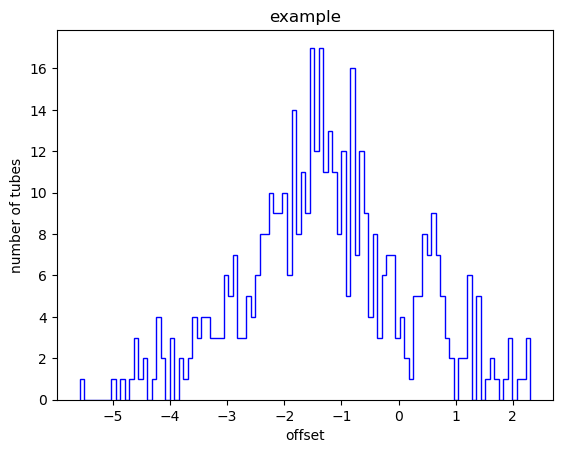

In [204]:
plt.hist(df["Threshold_offset[mV]"], bins=100, histtype="step", facecolor="none", edgecolor="blue")
plt.title("example")
plt.xlabel("offset")
plt.ylabel("number of tubes")
plt.show()

In [206]:
folder_path = r"C:\Users\svene\OneDrive\Documents\Tufts\Research\qual\eye_scanning\Noise"
big_data=all_tube_data(folder_path, ".txt", "Threshold_offset[mV]")

['Mod10_BIS2C04_Noise_Hyst14_HVOFF.txt', 'Mod10_BIS2C04_Noise_Hyst14_HVON.txt', 'Mod10_BIS2C04_Noise_Hyst7_HVOFF.txt', 'Mod10_BIS2C04_Noise_Hyst7_HVON.txt', 'Mod1_BIS1C02_Noise_Hyst14_HVOFF.txt', 'Mod1_BIS1C02_Noise_Hyst14_HVON.txt', 'Mod1_BIS1C02_Noise_Hyst7_HVOFF.txt', 'Mod1_BIS1C02_Noise_Hyst7_HVON.txt', 'Mod25_BIS4C08_Noise_Hyst14_HVOFF.txt', 'Mod25_BIS4C08_Noise_Hyst14_HVON.txt', 'Mod25_BIS4C08_Noise_Hyst7_HVOFF.txt', 'Mod25_BIS4C08_Noise_Hyst7_HVON.txt', 'Mod29_BIS4A16_Noise_Hyst14_HVOFF.txt', 'Mod29_BIS4A16_Noise_Hyst14_HVON.txt', 'Mod29_BIS4A16_Noise_Hyst7_HVOFF.txt', 'Mod29_BIS4A16_Noise_Hyst7_HVON.txt', 'Mod2_BIS1C04_Noise_Hyst14_HVOFF.txt', 'Mod2_BIS1C04_Noise_Hyst14_HVON.txt', 'Mod2_BIS1C04_Noise_Hyst7_HVOFF.txt', 'Mod2_BIS1C04_Noise_Hyst7_HVON.txt', 'Mod30_BIS5C02_Noise_Hyst14_HVOFF.txt', 'Mod30_BIS5C02_Noise_Hyst14_HVON.txt', 'Mod30_BIS5C02_Noise_Hyst7_HVOFF.txt', 'Mod30_BIS5C02_Noise_Hyst7_HVON.txt', 'Mod31_BIS5C04_Noise_Hyst14_HVOFF.txt', 'Mod31_BIS5C04_Noise_Hyst14_HVO

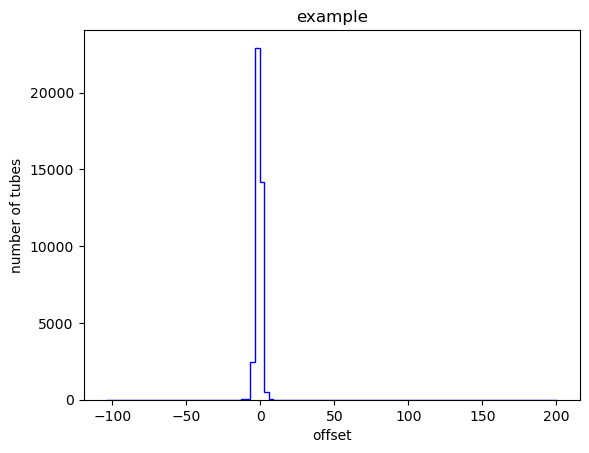

In [207]:
plt.hist(big_data, bins=100, histtype="step", facecolor="none", edgecolor="blue")
plt.title("example")
plt.xlabel("offset")
plt.ylabel("number of tubes")
plt.show()

In [208]:
# Removing dead tubes from noise file for individual tube

file="Mod1_BIS1C02_CosmicRay_Thr108.txt"
c_folder_path = r"C:\Users\svene\OneDrive\Documents\Tufts\Research\qual\eye_scanning\Cosmic_Data"
n_folder_path= r"C:\Users\svene\OneDrive\Documents\Tufts\Research\qual\eye_scanning\Noise"

path=c_folder_path+"\\"+file
print(path)
df=pd.read_csv(path, delimiter=",")

# Select dead tubes and store in arrays
df2=df.loc[(df['Resolution[um]']==0) & (df['Efficiency']==0)]
print(df2)

tdcs=[]
chs=[]

#Get metadata info:
keep,throwaway=file.split("_Cosmic")
print(keep)
j=keep+"_Noise_Hyst7_HVON.txt"

#remove dead tubes from noise txt file
df_noise=pd.read_csv(n_folder_path+"\\"+j, delimiter=",")
for k in range(0, len(df2)):
   
   tdc=df2.iloc[k, 2]
   ch=df2.iloc[k, 3]

   tdcs.append(tdc)
   chs.append(ch)

   condition1=df_noise["TDC_id"]==tdcs[k]
   condition2=df_noise["TDC_Ch_id"]==chs[k]

   combined= condition1 & condition2

   #df_noise=df_noise[-combined]
   #display(df_noise)

# now need to store the data leftover in an array together, then plot

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

#display(df_noise)

C:\Users\svene\OneDrive\Documents\Tufts\Research\qual\eye_scanning\Cosmic_Data\Mod1_BIS1C02_CosmicRay_Thr108.txt
     Column  Layer  TDC_id  TDC_Ch_id  T0[ns]  TMax[ns]  ADC_peak[ns]  \
20        3      5       1         10     0.0       0.0           0.0   
44        6      5       3          2     0.0       0.0           0.0   
100      13      5       5          6     0.0       0.0           0.0   

     ADC_width[ns]  Resolution[um]  Efficiency  
20             0.0             0.0         0.0  
44             0.0             0.0         0.0  
100            0.0             0.0         0.0  
Mod1_BIS1C02


In [209]:
# Removing dead tubes from noise file for all tubes in folder

c_folder_path = r"C:\Users\svene\OneDrive\Documents\Tufts\Research\qual\eye_scanning\Cosmic_Data"
n_folder_path= r"C:\Users\svene\OneDrive\Documents\Tufts\Research\qual\eye_scanning\Noise"


file_names=makelist(c_folder_path, ".txt")

data=[]

for m in file_names:

   path=c_folder_path+"\\"+m
   print(path)
   df=pd.read_csv(path, delimiter=",")

   # Select dead tubes and store in arrays
   df2=df.loc[(df['Resolution[um]']==0) & (df['Efficiency']==0)]
   print(df2)
   print("Number of dead tubes: ", len(df2))

   tdcs=[]
   chs=[]

   #Get metadata info:
   keep,throwaway=m.split("_Cosmic")
   print(keep)
   
   j=[keep+"_Noise_Hyst7_HVON.txt",keep+"_Noise_Hyst7_HVOFF.txt", keep+"_Noise_Hyst14_HVON.txt", keep+"_Noise_Hyst14_HVOFF.txt"]

   for n in j:
      
      print("processing", n, "now")

      # check if corresponding noise file exists

      if os.path.exists(n_folder_path+"\\"+n):
             
         print("FILE EXISTS")
         
         # remove dead tubes from noise txt file
         df_noise=pd.read_csv(n_folder_path+"\\"+n, delimiter=",")
         for k in range(0, len(df2)):
               
            tdc=df2.iloc[k, 2]
            ch=df2.iloc[k, 3]

            tdcs.append(tdc)
            chs.append(ch)

            condition1=df_noise["TDC_id"]==tdcs[k]
            condition2=df_noise["TDC_Ch_id"]==chs[k]

            combined= condition1 & condition2

            df_noise=df_noise[-combined]

            # Select parameter of interest
            values=df_noise["Threshold_offset[mV]"].tolist()

            # Add to summary array
            data+=values
            
            #display(df_noise)

      else: 
         print("Corresponding noise file does not exist")

['Mod10_BIS2C04_CosmicRay_Thr108.txt', 'Mod10_BIS2C04_CosmicRay_Thr114.txt', 'Mod11_BIS2C06_CosmicRay_Thr108.txt', 'Mod11_BIS2C06_CosmicRay_Thr114.txt', 'Mod15_BIS2C14_CosmicRay_Thr108.txt', 'Mod15_BIS2C14_CosmicRay_Thr114.txt', 'Mod16_BIS2A16_CosmicRay_Thr108.txt', 'Mod16_BIS2A16_CosmicRay_Thr114.txt', 'Mod1_BIS1C02_CosmicRay_Thr108.txt', 'Mod1_BIS1C02_CosmicRay_Thr114.txt', 'Mod22_BIS3A12_CosmicRay_Thr108.txt', 'Mod22_BIS3A12_CosmicRay_Thr114.txt', 'Mod25_BIS4C08_CosmicRay_Thr108.txt', 'Mod25_BIS4C08_CosmicRay_Thr114.txt', 'Mod29_BIS4A16_CosmicRay_Thr108.txt', 'Mod29_BIS4A16_CosmicRay_Thr114.txt', 'Mod2_BIS1C04_CosmicRay_Thr108.txt', 'Mod2_BIS1C04_CosmicRay_Thr114.txt', 'Mod30_BIS5C02_CosmicRay_Thr108.txt', 'Mod30_BIS5C02_CosmicRay_Thr114.txt', 'Mod31_BIS5C04_CosmicRay_Thr108.txt', 'Mod31_BIS5C04_CosmicRay_Thr114.txt', 'Mod32_BIS5C05_CosmicRay_Thr108.txt', 'Mod32_BIS5C05_CosmicRay_Thr114.txt', 'Mod33_BIS5C08_CosmicRay_Thr108.txt', 'Mod33_BIS5C08_CosmicRay_Thr114.txt', 'Mod34_BIS5C10_

In [210]:
print(len(data))

25272


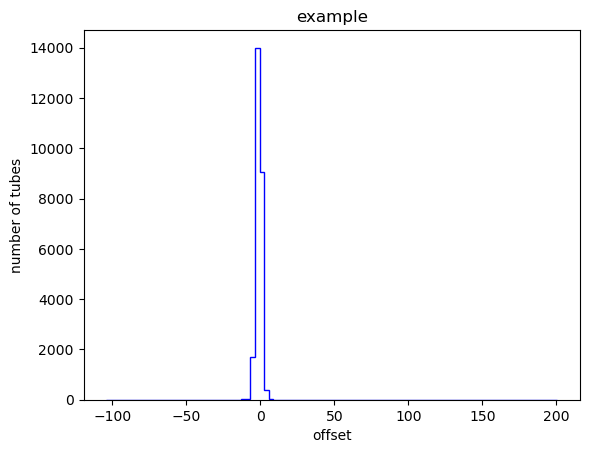

In [211]:
plt.figure()
plt.hist(data, bins=100, histtype="step", facecolor="none", edgecolor="blue")
plt.title("example")
plt.xlabel("offset")
plt.ylabel("number of tubes")
plt.show()

# Removing dead tubes doesn't seem to affect hist outliers...